In [11]:
# Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import librosa
import librosa.display
import IPython.display as ipd
import wave
import IPython
from sklearn.decomposition import NMF


In [12]:
def wav_to_signal(path):
    # turn wave file content into numpy array
    mix_wave = wave.open(path, 'r')
    signal_raw = mix_wave.readframes(-1)
    signal = np.frombuffer(signal_raw, dtype=np.int16)
    return signal, mix_wave.getframerate()

def plot_signal(signal, sr):
    timing = np.linspace(0, len(signal) / sr, num=len(signal))
    plt.figure(figsize=(12, 2))
    plt.title('Recording')
    plt.plot(timing, signal, c="#3ABFE7")
    plt.ylim(-35000, 35000)
    plt.show()


def signal_to_wav(signal, framerate, filename):
    # save numpy array as wave file
    signal = signal.astype(np.int16)
    wave_file = wave.open(filename, 'wb')
    wave_file.setnchannels(1)
    wave_file.setsampwidth(2)
    wave_file.setframerate(framerate)
    wave_file.writeframes(signal.tobytes())
    wave_file.close()


In [13]:

def divergence(V, W, H, beta=2):
    """
    beta = 2 : Euclidean cost function
    beta = 1 : Kullback-Leibler cost function
    beta = 0 : Itakura-Saito cost function
    """

    if beta == 0: return np.sum(V / (W @ H) - math.log10(V / (W @ H)) - 1)

    if beta == 1: return np.sum(V * math.log10(V / (W @ H)) + (W @ H - V))

    if beta == 2: return 1 / 2 * np.linalg.norm(W @ H - V)


# def NMF(V, S, beta=2, threshold=0.05, MAXITER=200):
#     """
#     inputs :
#     --------
#         V         : Mixture signal : |TFST|
#         S         : The number of sources to extract
#         beta      : Beta divergence considered, default=2 (Euclidean)
#         threshold : Stop criterion
#         MAXITER   : The number of maximum iterations, default=1000
#
#     outputs :
#     ---------
#         W : dictionary matrix [KxS], W>=0
#         H : activation matrix [SxN], H>=0
#         cost_function : the optimised cost function over iterations
#
#    Algorithm :
#    -----------
#
#     1) Randomly initialize W and H matrices
#     2) Multiplicative update of W and H
#     3) Repeat step (2) until convergence or after MAXITER
#     """
#
#     counter = 0
#     cost_function = []
#     beta_divergence = 1
#
#     K, N = np.shape(V)
#
#     # Initialisation of W and H matrices : The initialization is generally random
#     W = np.abs(np.random.normal(loc=0, scale=2.5, size=(K, S)))
#     H = np.abs(np.random.normal(loc=0, scale=2.5, size=(S, N)))
#
#     while beta_divergence >= threshold and counter <= MAXITER:
#         print(beta_divergence)
#         # Update of W and H
#         H *= (W.T @ (((W @ H) ** (beta - 2)) * V)) / (W.T @ ((W @ H) ** (beta - 1)) + 10e-10)
#         W *= (((W @ H) ** (beta - 2) * V) @ H.T) / ((W @ H) ** (beta - 1) @ H.T + 10e-10)
#
#         # Compute cost function
#         beta_divergence = divergence(V, W, H, beta=2)
#         cost_function.append(beta_divergence)
#         counter += 1
#
#     return W, H, cost_function



44100


/tmp/ipykernel_11916/1427714791.py:15: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(audio_sound, sr=sr, ax=ax, x_axis='time')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Audio spectrogram')

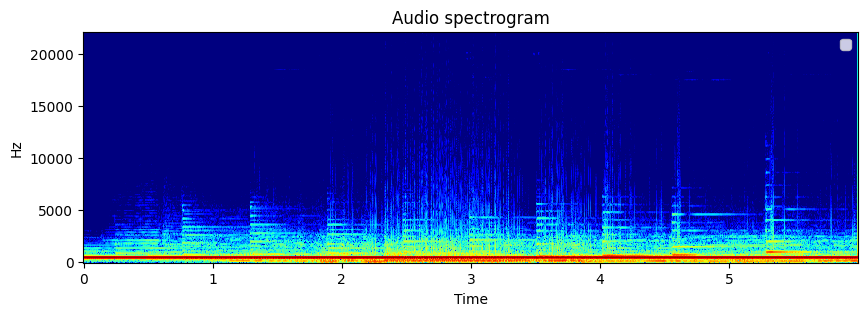

In [14]:
# Load audio recording signal
audio_file = '../AudioData/ICA_mix3.wav'
sample_rate = 44100
audio_sound, sr = librosa.load(audio_file, sr=sample_rate)
print(sr)

HOP = 256
FRAME = 512

# Display audio
ipd.Audio(audio_sound, rate=sr)

# Plotting the sound's signal waveform
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(audio_sound, sr=sr, ax=ax, x_axis='time')
ax.set(title='The sound waveform', xlabel='Time [s]')
ax.legend()

# Return the complex Short Term Fourier Transform
sound_stft = librosa.stft(audio_sound, n_fft=512, hop_length=256)

# Magnitude Spectrogram
sound_stft_Magnitude = np.abs(sound_stft)

# Phase spectrogram
sound_stft_Angle = np.angle(sound_stft)

# Plot Spectogram
Spec = librosa.amplitude_to_db(sound_stft_Magnitude, ref=np.max)
librosa.display.specshow(Spec, y_axis='hz', sr=sr, hop_length=HOP, x_axis='time', cmap=matplotlib.cm.jet)
plt.title('Audio spectrogram')


/home/sviat/.local/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


360.2871142401571


/tmp/ipykernel_11916/3437154988.py:58: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(reconstructed_sounds[i], sr=sr, color=colors[i], ax=ax[i], label=f'Source {i}',


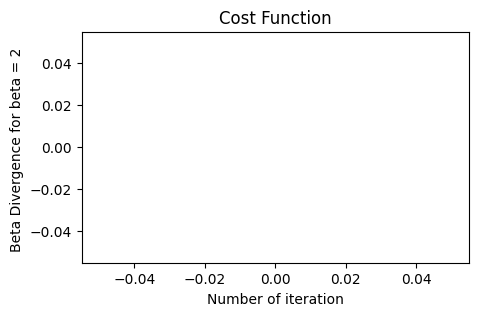

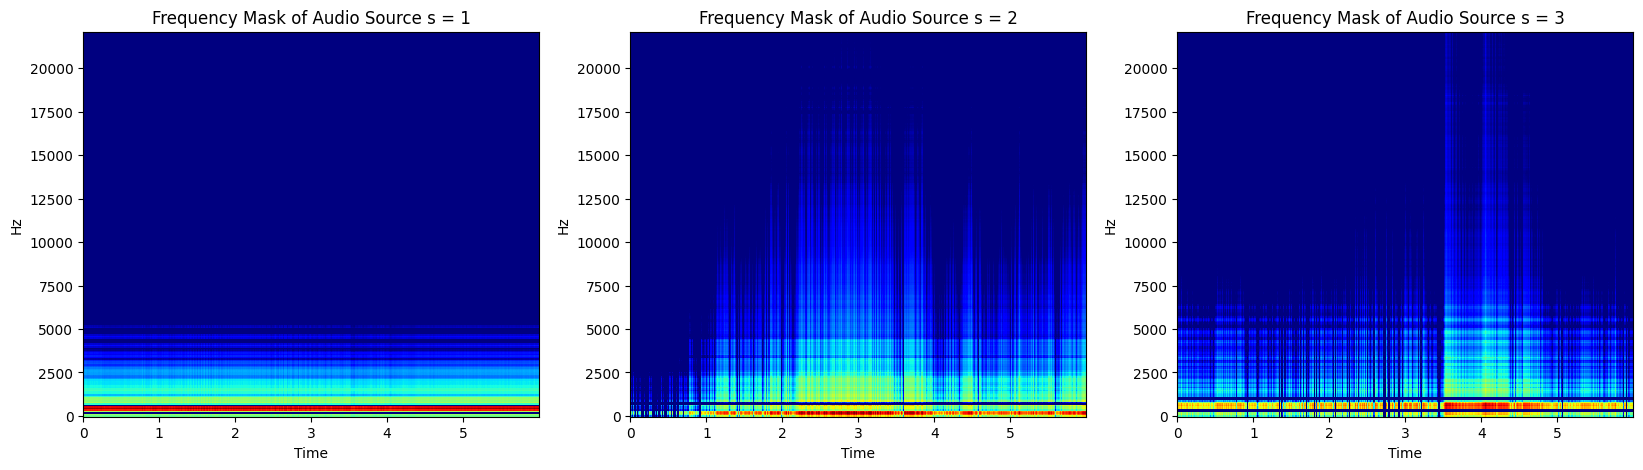

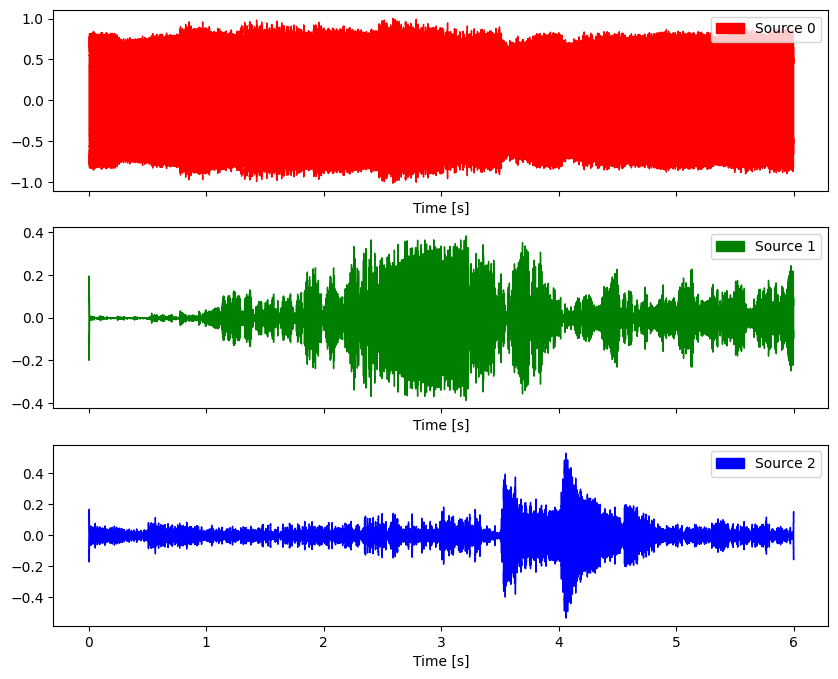

In [15]:

V = sound_stft_Magnitude + 1e-10
beta = 2
S = 3

# Applying the NMF function
# W, H, cost_function = NMF(V, S, beta=beta, threshold=0.05)

# Initialize NMF model with desired number of components (e.g., 2)
nmf_model = NMF(n_components=3, random_state=42)

# Fit the NMF model to the matrix V
nmf_model.fit(V)

# Transform the original matrix V
W = nmf_model.transform(V)

# Get the H matrix from the fitted NMF model
H = nmf_model.components_

cost_function = nmf_model.reconstruction_err_
print(cost_function)

# Ploting the cost function
plt.figure(figsize=(5, 3))
plt.plot()
plt.title("Cost Function")
plt.xlabel("Number of iteration")
plt.ylabel(f"Beta Divergence for beta = {beta} ")

# After NMF, each audio source S can be expressed as a frequency mask over time
f, axs = plt.subplots(nrows=1, ncols=S, figsize=(20, 5))
filtered_spectrograms = []
for i in range(S):
    axs[i].set_title(f"Frequency Mask of Audio Source s = {i + 1}")
    # Filter eash source components
    filtered_spectrogram = W[:, [i]] @ H[[i], :]
    # Compute the filtered spectrogram
    D = librosa.amplitude_to_db(filtered_spectrogram, ref=np.max)
    # Show the filtered spectrogram
    librosa.display.specshow(D, y_axis='hz', sr=sr, hop_length=HOP, x_axis='time', cmap=matplotlib.cm.jet, ax=axs[i])

    filtered_spectrograms.append(filtered_spectrogram)

reconstructed_sounds = []
for i in range(S):
    reconstruct = filtered_spectrograms[i] * np.exp(1j * sound_stft_Angle)
    new_sound = librosa.istft(reconstruct, n_fft=FRAME, hop_length=HOP)
    reconstructed_sounds.append(new_sound)

    path = f"../AudioData/ICA_result{i}.wav"
    signal_to_wav(new_sound * 5_000, sr, path)
    IPython.display.Audio(path)

# Tracing the waveform
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))
for i in range(S):
    librosa.display.waveshow(reconstructed_sounds[i], sr=sr, color=colors[i], ax=ax[i], label=f'Source {i}',
                             x_axis='time')
    ax[i].set(xlabel='Time [s]')
    ax[i].legend()

plt.show()

In [16]:
i = 2
IPython.display.Audio(f'separated_source_{i}.wav')

In [17]:
IPython.display.Audio(f'../AudioData/sounds_mixedX.wav')

In [18]:
IPython.display.Audio(f'../AudioData/audio_13-14_X2.wav')